In [2]:

import pandas as pd
df =pd.read_csv("Zoo.csv")
df



,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

#  Analyse the data using the visualizations

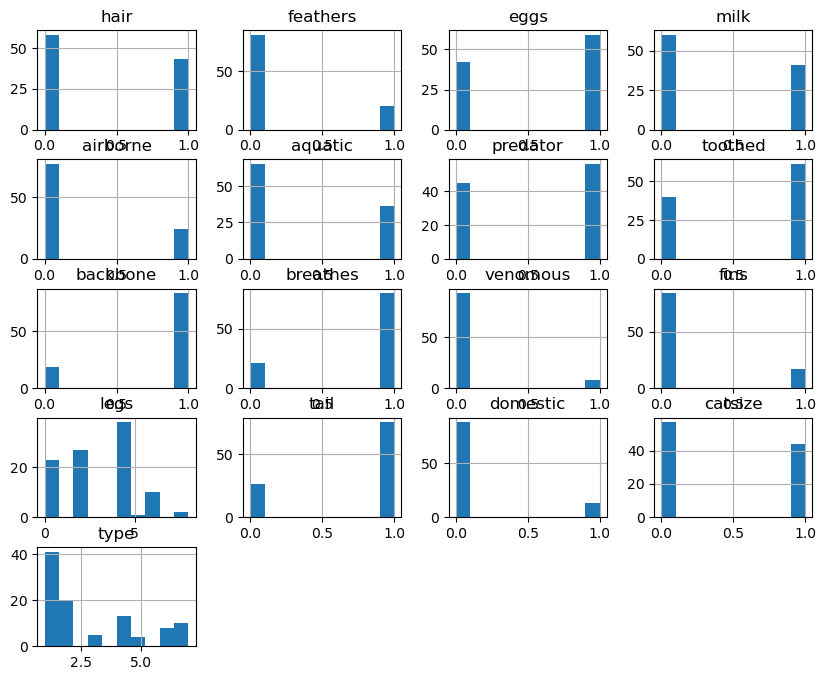

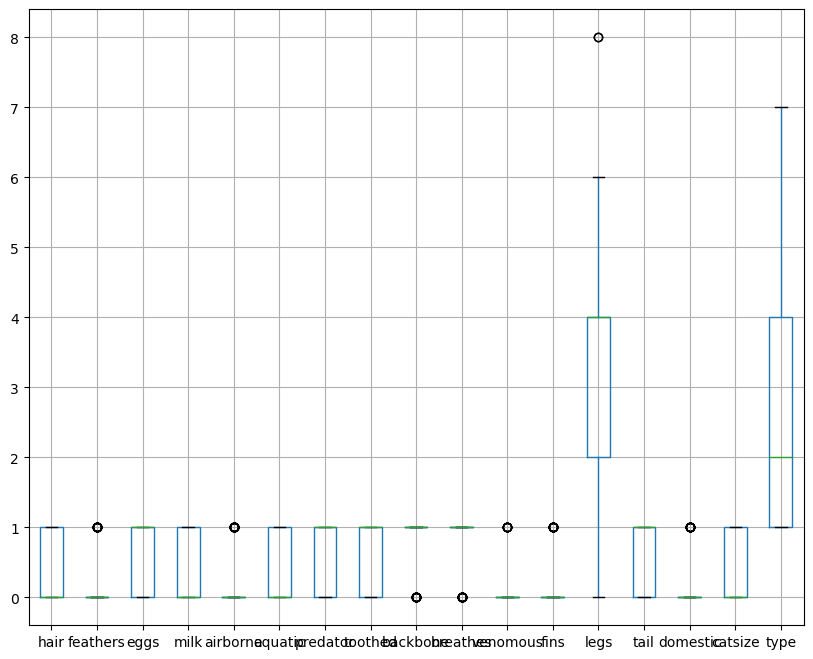

In [4]:


import matplotlib.pyplot as plt

# Plot the distribution of each column
df.hist(figsize=(10, 8))
plt.show()

# Plot the correlation matrix
import seaborn as sns


# Plot the boxplots of each column
df.boxplot(figsize=(10, 8))
plt.show()

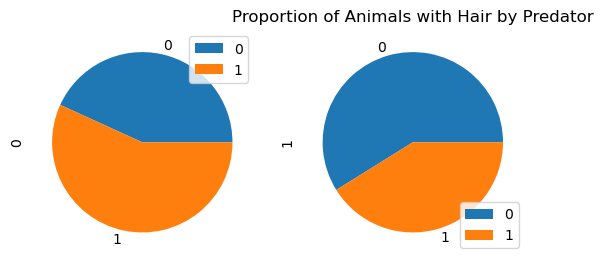

In [5]:
import matplotlib.pyplot as plt
(df.groupby('predator')['hair'].value_counts(normalize=True) * 100).unstack().plot(kind='pie', subplots=True)
_ = plt.title('Proportion of Animals with Hair by Predator')

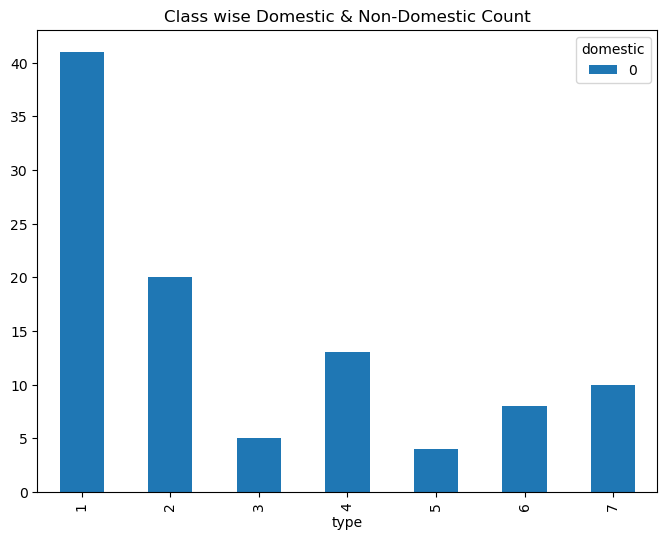

In [27]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(df['type'], df['domestic']).plot(kind="bar", figsize=(8, 6), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

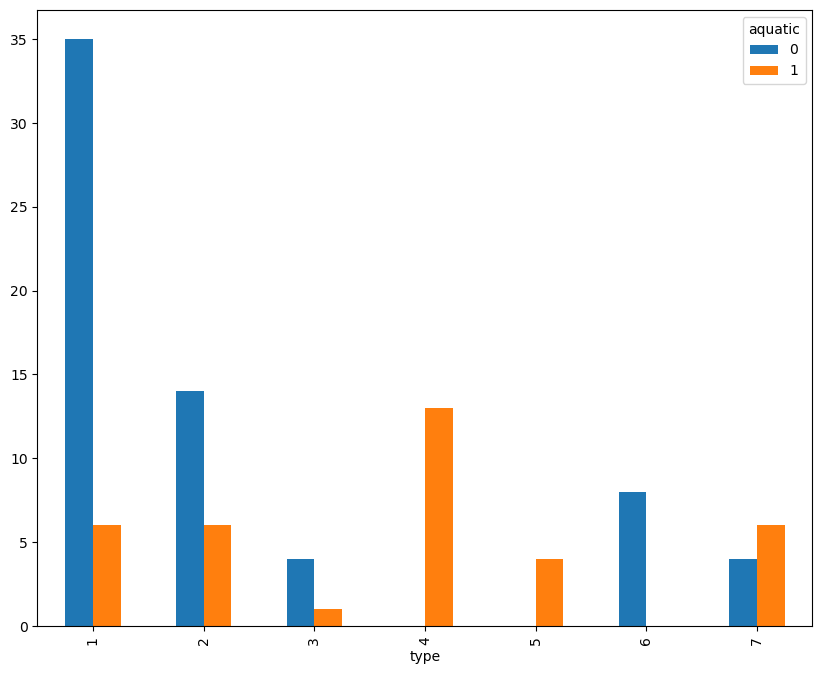

In [6]:
pd.crosstab(df['type'], df['aquatic']).plot(kind="bar", figsize=(10, 8));

#  Preprocess the data by handling missing values & Outliers, if any

In [7]:


# Handling Missing Values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [8]:
df['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [9]:
#check if there are duplicates in animal_name
duplicates = df['animal name'].value_counts()
duplicates[duplicates > 1]

animal name
frog    2
Name: count, dtype: int64

In [10]:
frog = df[df['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [11]:
df.drop(26)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Preprocess the data by handling  Outliers

In [12]:

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Handle outliers using IQR method
for col in numerical_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Check for remaining outliers
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.0,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.0,101.0,101.0,101.0,101.000000,101.000000,101.0,101.000000,101.000000
mean,0.425743,0.0,0.584158,0.405941,0.0,0.356436,0.554455,0.603960,1.0,1.0,0.0,0.0,2.821782,0.742574,0.0,0.435644,2.831683
std,0.496921,0.0,0.495325,0.493522,0.0,0.481335,0.499505,0.491512,0.0,0.0,0.0,0.0,1.986938,0.439397,0.0,0.498314,2.102709
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000
25%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,2.000000,0.000000,0.0,0.000000,1.000000
50%,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,4.000000,1.000000,0.0,0.000000,2.000000
75%,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,4.000000,1.000000,0.0,1.000000,4.000000
max,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,7.000000,1.000000,0.0,1.000000,7.000000


# standardization of data

In [13]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [14]:

SS_X  = SS.fit_transform(df.iloc[:,1:16])
SS_X

# spliting the data in x and y
X = SS_X
Y = df.iloc[:,16]

#  Split the dataset into training and testing sets (80% training, 20% testing).

In [15]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, Y_train)

# Predict the labels for the training data
Y_train_pred = knn.predict(X_train)

# Predict the labels for the test data
Y_test_pred = knn.predict(X_test)

In [17]:
# Calculate the accuracy for the training data
train_accuracy = knn.score(X_train, Y_train)

# Calculate the accuracy for the test data
test_accuracy = knn.score(X_test, Y_test)

# Print the training and test accuracies
print("Training Accuracy:", train_accuracy.round(3))
print("Test Accuracy:", test_accuracy.round(3))

Training Accuracy: 0.762
Test Accuracy: 0.714


In [18]:
from sklearn.metrics import log_loss
Training_loss = log_loss(Y_train,Y_train_pred)
Test_loss = log_loss(Y_test,Y_test_pred)

# Print the training and test accuracies
print("Training_loss:", Training_loss.round(3))
print("Test_loss:", Test_loss.round(3))


Training_loss: 8.56
Test_loss: 10.298


In [20]:
# cross validation
training_accuracy = []
test_accuracy = []

# Create a KNeighborsClassifier object
import numpy as np
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.metrics import accuracy_score


for i in range(1,200,1):
    X_train,X_test,Y_train,Y_test   = train_test_split(X,Y,test_size=0.20,random_state=i)
    knn.fit(X_train,Y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,y_pred_test))

print("Crossvalidation: Training accuracy",np.mean(training_accuracy).round(2))
print("Crossvalidation: Test accuracy",np.mean(test_accuracy).round(2))

Crossvalidation: Training accuracy 0.8
Crossvalidation: Test accuracy 0.73


In [ ]:
# apply the same method of cross validation as above for all k values such as 5,7,9,11,13,15,17 but we need for each k value average accuracies should be separated

In [21]:
import numpy as np
from sklearn.metrics import accuracy_score
training_accuracy_list = []
test_accuracy_list = []

for k in range(5, 18, 2):
    training_accuracy = []
    test_accuracy = []

    for i in range(1, 200, 1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=i)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
        training_accuracy.append(accuracy_score(Y_train, y_pred_train))
        test_accuracy.append(accuracy_score(Y_test, y_pred_test))

    training_accuracy_list.append(np.mean(training_accuracy).round(2))
    test_accuracy_list.append(np.mean(test_accuracy).round(2))

print("Training Accuracies:", training_accuracy_list)
print("Test Accuracies:", test_accuracy_list)

Training Accuracies: [0.8, 0.79, 0.79, 0.79, 0.79, 0.78, 0.78]
Test Accuracies: [0.73, 0.75, 0.77, 0.78, 0.78, 0.78, 0.79]


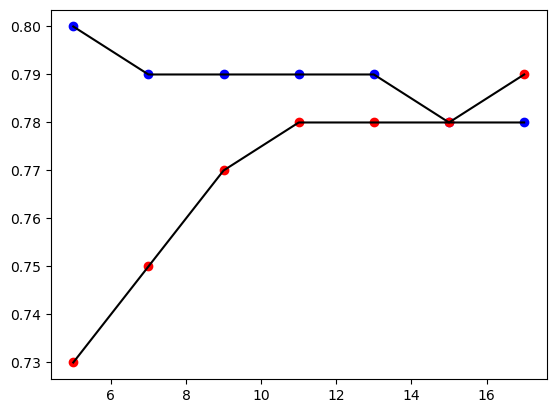

In [22]:

import matplotlib.pyplot as plt
plt.scatter(range(5, 18, 2),training_accuracy_list,color='blue')
plt.plot(range(5, 18, 2),training_accuracy_list,color='black')
plt.scatter(range(5, 18, 2),test_accuracy_list,color='red')
plt.plot(range(5, 18, 2),test_accuracy_list,color='black')
plt.show()

In [43]:
# Best  test accuracy is 0.79 with K = 17.


In [23]:
 #testing set using accuracy, precision, recall, and F1-score metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [24]:
# Calculate accuracy, precision, recall, and F1-score for the test set
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()

#fit the model
Logreg.fit(SS_X,Y)
#preictions

y_pred = Logreg.predict(X)
y_pred


array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [33]:
#testing set using accuracy, precision, recall, and F1-score metrics.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score for the test set
accuracy = accuracy_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred, average='weighted')
recall = recall_score(Y_test, Y_test_pred, average='weighted')
f1 = f1_score(Y_test, Y_test_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy.round(3))
print("Precision:", precision.round(3))
print("Recall:", recall.round(3))
print("F1-Score:", f1.round(3))

Accuracy: 0.714
Precision: 0.815
Recall: 0.714
F1-Score: 0.684


# Visualize the decision boundaries 

C:\Users\New\AppData\Local\Temp\ipykernel_3496\3900858427.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1],


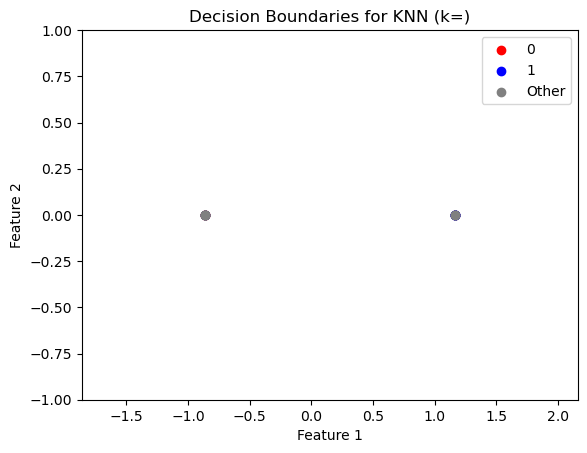

In [26]:
 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(["red","blue","green"])
cmap_bold = ListedColormap(["red","green","blue"])

# Plot the decision boundaries
for i, j in enumerate(np.unique(Y)):
  plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1],
              c=cmap_light(i), label=j)

# Plot the data points
plt.scatter(X_test[Y_test != j, 0], X_test[Y_test != j, 1],
            c='gray', label='Other')

# Add labels and title
plt.xlim(X_test[:, 0].min() - 1, X_test[:, 0].max() + 1)
plt.ylim(X_test[:, 1].min() - 1, X_test[:, 1].max() + 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for KNN (k=)')
plt.legend()
plt.show()

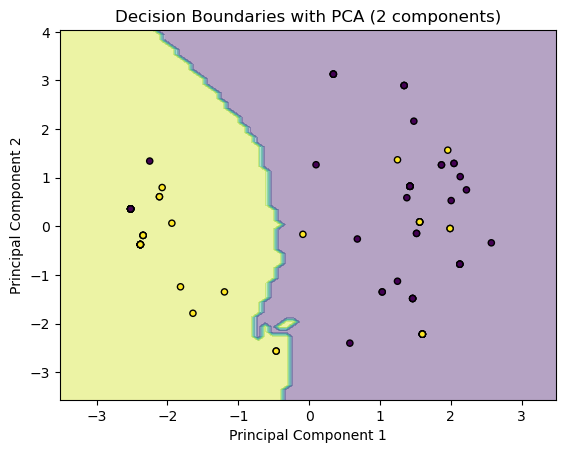

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your data stored in X (features) and y (target variable)

# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
SS_X_pca = pca.fit_transform(SS_X)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(SS_X_pca, Y)

# Create a meshgrid for visualization
x_min, x_max = SS_X_pca[:, 0].min() - 1, SS_X_pca[:, 0].max() + 1
y_min, y_max = SS_X_pca[:, 1].min() - 1, SS_X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(SS_X_pca[:, 0], SS_X_pca[:, 1], c=Y, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries with PCA (2 components)')
plt.show()